In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import math
import pickle
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/My Drive/filtered6_dataset.csv"

# Load Data

In [4]:
# Load the csv file
df = pd.read_csv(file_path)
df

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,total_power,dominant_frequency,fft1,fft2,fft3,fft4,fft5,power_ratio,subject_id,label
0,0.180077,0.218750,0.421875,0.640625,0.182377,-0.129712,0.035568,7.611720,0.234375,0.952541,...,0.005288,1.560976,2.916588,5.748035,1.265770,0.279039,0.107661,4.196146,S001,N
1,0.116188,0.218750,0.421875,0.640625,0.116940,-0.142917,-0.011494,6.401779,0.187500,0.632139,...,0.004130,1.560976,0.942475,4.903048,1.170524,0.241586,0.010196,3.693372,S001,N
2,0.121023,0.218750,0.421875,0.648438,0.121389,-0.140039,-0.005806,6.333089,0.195312,0.619593,...,0.004146,1.560976,0.476099,4.853160,1.269356,0.336398,0.088376,3.344450,S001,N
3,0.138627,0.171875,0.328125,0.500000,0.139091,-0.075619,0.046283,4.516074,0.218750,0.440520,...,0.001843,2.000000,2.962109,3.009263,0.748133,0.258063,0.116591,3.100019,S001,N
4,0.068806,0.171875,0.328125,0.781250,0.069293,-0.078520,-0.000457,2.713990,0.156250,0.146076,...,0.001081,2.000000,0.029221,2.115377,0.439297,0.044651,0.016416,2.799579,S001,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202383,0.499998,0.226562,0.437500,0.734375,0.499998,-0.359638,0.019270,17.218056,0.140625,5.511694,...,0.040839,1.505882,1.637929,12.890518,7.828788,2.320222,0.230425,3.690086,S118,N
202384,0.550178,0.250000,0.476562,0.726562,0.550178,-0.391033,0.022467,19.873999,0.156250,7.070209,...,0.053460,1.376344,2.089437,14.987465,9.752007,2.597727,0.096489,4.069932,S118,N
202385,0.502216,0.250000,0.476562,0.726562,0.502216,-0.390489,-0.019317,19.858934,0.140625,6.572488,...,0.049566,1.376344,1.796471,14.453389,9.242147,3.022286,0.498451,4.203525,S118,N
202386,0.353672,0.234375,0.445312,0.679688,0.353672,-0.475695,-0.049775,14.960191,0.125000,4.601866,...,0.028173,2.942529,4.330394,8.686023,10.318711,2.294286,0.902660,5.407155,S118,N


In [5]:
# Check the label distribution
df['label'].value_counts()

,count
label,
N,185476
S,9297
V,7615


# Scale

In [6]:
from sklearn.preprocessing import StandardScaler

variables_used = df.iloc[:,:-2] #no target

scaler = StandardScaler().fit(variables_used) # No target
scaled_df = pd.DataFrame(scaler.transform(variables_used))
scaled_df.columns = variables_used.columns

scaled_df.tail()

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,kurtosis,entropy,total_power,dominant_frequency,fft1,fft2,fft3,fft4,fft5,power_ratio
202383,0.115793,-0.313619,-0.262530,-0.091453,-0.279037,0.442331,0.003452,-0.503430,-0.609704,-0.413688,...,0.133323,-0.238617,-0.361320,-0.176159,-0.497075,-0.416768,-0.267961,-0.395325,-0.568033,-0.086257
202384,0.199018,0.041740,0.056919,-0.122778,-0.206094,0.398296,0.017504,-0.424494,-0.487979,-0.391294,...,0.271848,0.097535,-0.334111,-0.389061,-0.467502,-0.327067,-0.113126,-0.351551,-0.604489,-0.084156
202385,0.119471,0.041740,0.056919,-0.122778,-0.275814,0.399059,-0.166142,-0.424942,-0.609704,-0.398446,...,0.286549,-0.015070,-0.342504,-0.389061,-0.486691,-0.349913,-0.154174,-0.284580,-0.495079,-0.083418
202386,-0.126894,-0.195166,-0.198640,-0.310724,-0.491741,0.279547,-0.300008,-0.570536,-0.731428,-0.426762,...,0.960099,0.116681,-0.388626,2.185042,-0.320720,-0.596622,-0.067502,-0.399416,-0.385058,-0.076763
202387,0.399251,-0.195166,-0.198640,-0.046246,-0.025775,0.574028,0.759528,-0.297886,-0.244531,-0.354612,...,-0.094742,0.028970,-0.348995,-0.233055,0.485731,-0.349265,-0.243900,-0.462108,-0.479117,-0.090334


In [7]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

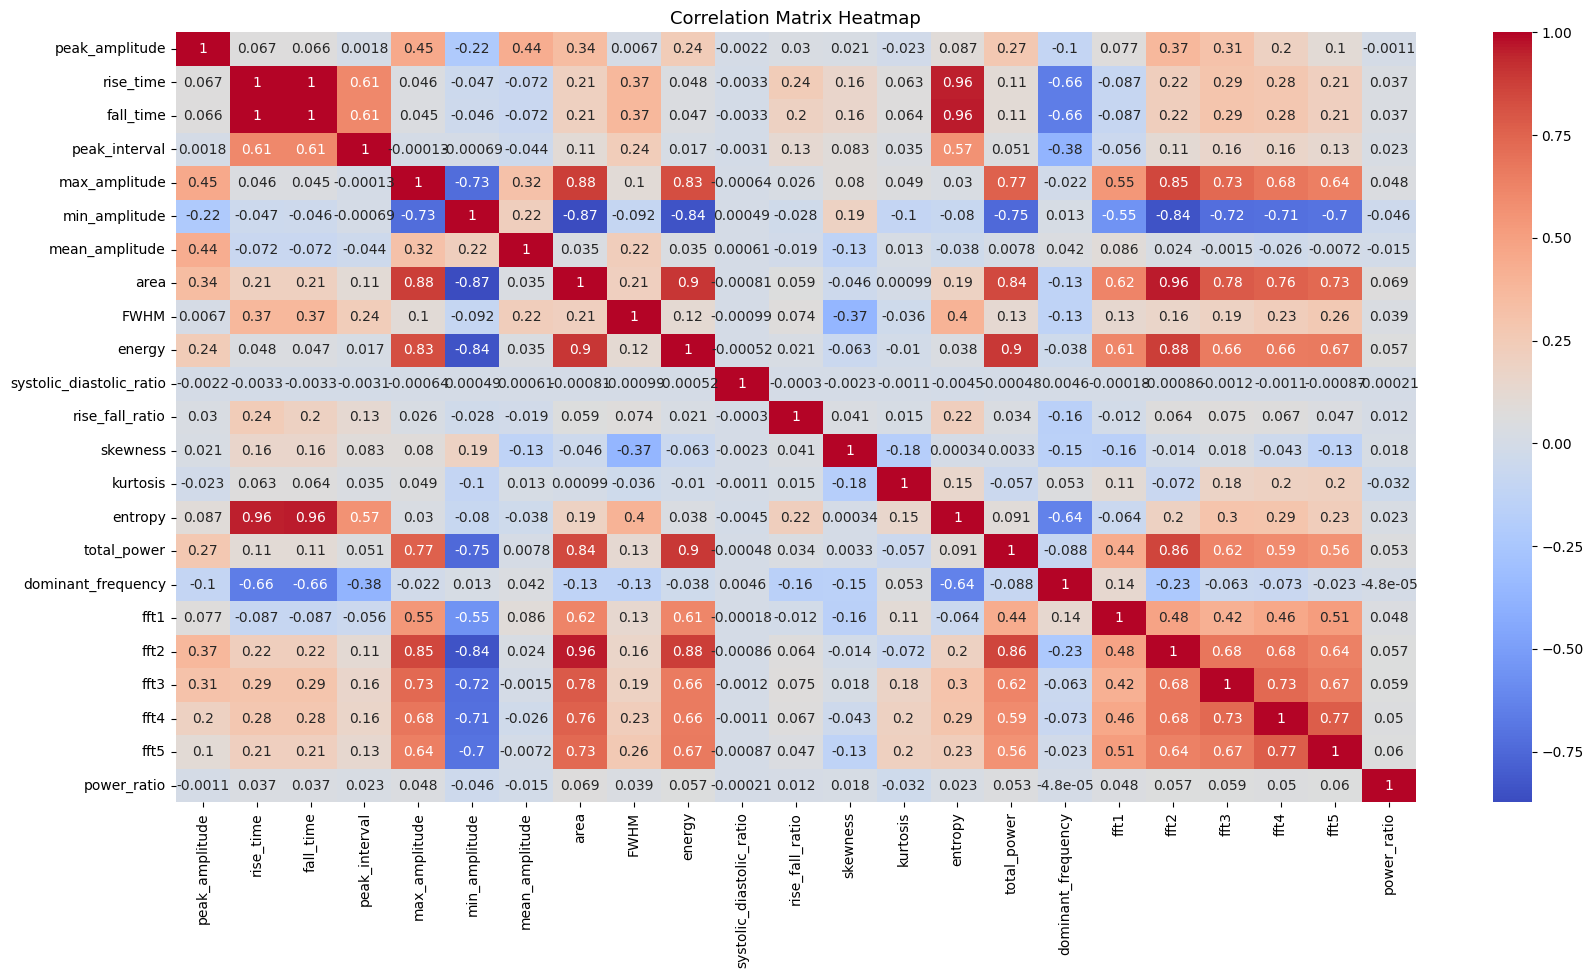

In [8]:
# Visualize correlation among features
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap', fontsize=13)
    plt.show()


# Plot correlation matrix
average_correlation = plot_correlation_matrix(scaled_df)

In [9]:
df = pd.concat([scaled_df, df['label'], df['subject_id']], axis=1)
df

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,total_power,dominant_frequency,fft1,fft2,fft3,fft4,fft5,power_ratio,label,subject_id
0,-0.414807,-0.432072,-0.390309,-0.467345,-0.740741,0.764831,0.075085,-0.788937,0.120642,-0.479199,...,-0.437963,-0.085610,-0.413324,-0.722299,-0.796337,-0.717305,-0.601448,-0.083459,N,S001
1,-0.520770,-0.432072,-0.390309,-0.467345,-0.835862,0.746310,-0.131758,-0.824898,-0.244531,-0.483803,...,-0.440459,-0.085610,-0.542627,-0.758444,-0.804005,-0.723213,-0.627977,-0.086238,N,S001
2,-0.512751,-0.432072,-0.390309,-0.436021,-0.829395,0.750346,-0.106760,-0.826939,-0.183669,-0.483983,...,-0.440423,-0.085610,-0.573175,-0.760578,-0.796048,-0.708257,-0.606697,-0.088168,N,S001
3,-0.483554,-1.142789,-1.156986,-1.031184,-0.803662,0.840704,0.122178,-0.880942,-0.001082,-0.486556,...,-0.445389,0.635949,-0.410342,-0.839454,-0.838011,-0.720614,-0.599017,-0.089519,N,S001
4,-0.599355,-1.142789,-1.156986,0.096493,-0.905123,0.836635,-0.083248,-0.934501,-0.487979,-0.490787,...,-0.447033,0.635949,-0.602445,-0.877691,-0.862875,-0.754278,-0.626284,-0.091180,S,S001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202383,0.115793,-0.313619,-0.262530,-0.091453,-0.279037,0.442331,0.003452,-0.503430,-0.609704,-0.413688,...,-0.361320,-0.176159,-0.497075,-0.416768,-0.267961,-0.395325,-0.568033,-0.086257,N,S118
202384,0.199018,0.041740,0.056919,-0.122778,-0.206094,0.398296,0.017504,-0.424494,-0.487979,-0.391294,...,-0.334111,-0.389061,-0.467502,-0.327067,-0.113126,-0.351551,-0.604489,-0.084156,N,S118
202385,0.119471,0.041740,0.056919,-0.122778,-0.275814,0.399059,-0.166142,-0.424942,-0.609704,-0.398446,...,-0.342504,-0.389061,-0.486691,-0.349913,-0.154174,-0.284580,-0.495079,-0.083418,N,S118
202386,-0.126894,-0.195166,-0.198640,-0.310724,-0.491741,0.279547,-0.300008,-0.570536,-0.731428,-0.426762,...,-0.388626,2.185042,-0.320720,-0.596622,-0.067502,-0.399416,-0.385058,-0.076763,N,S118


In [10]:
# One-hot encode the labels
df = pd.get_dummies(df, columns=['label'])
df

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,fft1,fft2,fft3,fft4,fft5,power_ratio,subject_id,label_N,label_S,label_V
0,-0.414807,-0.432072,-0.390309,-0.467345,-0.740741,0.764831,0.075085,-0.788937,0.120642,-0.479199,...,-0.413324,-0.722299,-0.796337,-0.717305,-0.601448,-0.083459,S001,True,False,False
1,-0.520770,-0.432072,-0.390309,-0.467345,-0.835862,0.746310,-0.131758,-0.824898,-0.244531,-0.483803,...,-0.542627,-0.758444,-0.804005,-0.723213,-0.627977,-0.086238,S001,True,False,False
2,-0.512751,-0.432072,-0.390309,-0.436021,-0.829395,0.750346,-0.106760,-0.826939,-0.183669,-0.483983,...,-0.573175,-0.760578,-0.796048,-0.708257,-0.606697,-0.088168,S001,True,False,False
3,-0.483554,-1.142789,-1.156986,-1.031184,-0.803662,0.840704,0.122178,-0.880942,-0.001082,-0.486556,...,-0.410342,-0.839454,-0.838011,-0.720614,-0.599017,-0.089519,S001,True,False,False
4,-0.599355,-1.142789,-1.156986,0.096493,-0.905123,0.836635,-0.083248,-0.934501,-0.487979,-0.490787,...,-0.602445,-0.877691,-0.862875,-0.754278,-0.626284,-0.091180,S001,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202383,0.115793,-0.313619,-0.262530,-0.091453,-0.279037,0.442331,0.003452,-0.503430,-0.609704,-0.413688,...,-0.497075,-0.416768,-0.267961,-0.395325,-0.568033,-0.086257,S118,True,False,False
202384,0.199018,0.041740,0.056919,-0.122778,-0.206094,0.398296,0.017504,-0.424494,-0.487979,-0.391294,...,-0.467502,-0.327067,-0.113126,-0.351551,-0.604489,-0.084156,S118,True,False,False
202385,0.119471,0.041740,0.056919,-0.122778,-0.275814,0.399059,-0.166142,-0.424942,-0.609704,-0.398446,...,-0.486691,-0.349913,-0.154174,-0.284580,-0.495079,-0.083418,S118,True,False,False
202386,-0.126894,-0.195166,-0.198640,-0.310724,-0.491741,0.279547,-0.300008,-0.570536,-0.731428,-0.426762,...,-0.320720,-0.596622,-0.067502,-0.399416,-0.385058,-0.076763,S118,True,False,False


# Train/Test split

In [11]:
# Separate the features and labels
X = df.drop(columns=['label_N', 'label_S', 'label_V'])
y = df[['label_N', 'label_S', 'label_V']]

In [12]:
from collections import Counter

# Raggruppa i dati per soggetto
grouped = df.groupby('subject_id')

# Crea una lista dei soggetti e la distribuzione delle classi per ogni soggetto
subjects = list(grouped.groups.keys())
subject_class_distribution = []

for subject in subjects:
    label_sums = grouped.get_group(subject)[['label_N', 'label_S', 'label_V']].sum()
    subject_class_distribution.append(label_sums)

# Crea un DataFrame per aiutare nella divisione
subject_distribution_df = pd.DataFrame(subject_class_distribution).fillna(0)
subject_distribution_df['subject_id'] = subjects

# Ordina i soggetti in base alla proporzione di classe dominante (somma delle etichette)
subject_distribution_df['dominant_class'] = subject_distribution_df[['label_N', 'label_S', 'label_V']].idxmax(axis=1)
subject_distribution_df = subject_distribution_df.sort_values(by=['dominant_class', 'label_N', 'label_S', 'label_V'], ascending=False)

# Dividi i soggetti cercando di mantenere le proporzioni
train_subjects = []
test_subjects = []
train_distribution = Counter()
test_distribution = Counter()

for _, row in subject_distribution_df.iterrows():
    subject = row['subject_id']
    class_counts = Counter(grouped.get_group(subject)[['label_N', 'label_S', 'label_V']].sum().to_dict())

    if sum((train_distribution + class_counts).values()) <= len(df) * 0.7:
        train_subjects.append(subject)
        train_distribution += class_counts
    else:
        test_subjects.append(subject)
        test_distribution += class_counts

# Separa i dati di train e test in base ai soggetti selezionati
train_df = df[df['subject_id'].isin(train_subjects)]
test_df = df[df['subject_id'].isin(test_subjects)]

# Separa le feature e le label
X_train = train_df.drop(columns=['label_N', 'label_S', 'label_V', 'subject_id'])
y_train = train_df[['label_N', 'label_S', 'label_V']].astype(int)
X_test = test_df.drop(columns=['label_N', 'label_S', 'label_V', 'subject_id'])
y_test = test_df[['label_N', 'label_S', 'label_V']].astype(int)

# Verifica delle dimensioni e della distribuzione
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train class distribution:\n{y_train.sum(axis=0)}")
print(f"Test class distribution:\n{y_test.sum(axis=0)}")

Train shape: (141252, 23), Test shape: (61136, 23)
Train class distribution:
label_N    130539
label_S      6268
label_V      4445
dtype: int64
Test class distribution:
label_N    54937
label_S     3029
label_V     3170
dtype: int64


In [13]:
# Calcola la distribuzione delle label nel set di train
train_label_distribution = y_train.sum(axis=0)
print("Distribuzione delle label nel set di train:")
print(train_label_distribution)

# Calcola la distribuzione delle label nel set di test
test_label_distribution = y_test.sum(axis=0)
print("\nDistribuzione delle label nel set di test:")
print(test_label_distribution)

Distribuzione delle label nel set di train:
label_N    130539
label_S      6268
label_V      4445
dtype: int64

Distribuzione delle label nel set di test:
label_N    54937
label_S     3029
label_V     3170
dtype: int64


In [14]:
# Convert one-hot encoded labels to single column of class labels
y_train_single = y_train.idxmax(axis=1)
y_test_single = y_test.idxmax(axis=1)

In [15]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_single)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
label_N    130539
label_S    130539
label_V    130539
Name: count, dtype: int64


# Models

In [16]:
!pip install scikit-optimizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.0 MB/s eta 0:00:00


In [17]:
import sys
sys.path.append('/content/drive/My Drive')

In [18]:
import ml_functions_multi as ml
import custom_three as cm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Wrap the KNN classifier with OneVsRestClassifier
classifier = OneVsRestClassifier(KNeighborsClassifier())

# Define the parameter grid for the number of neighbors
parameters = {'estimator__n_neighbors': [5, 10, 25]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(classifier, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and its parameters
best_model_knn = grid_search.best_estimator_
best_params_knn = grid_search.best_params_

# Print the best parameters
print(f"Best Parameters: {best_params_knn}")

Best Parameters: {'estimator__n_neighbors': 5}


In [ ]:
# Predici le etichette per i dati di test
y_pred = best_model_knn.predict(X_test)

# Report di classificazione per ogni classe
detailed_report = classification_report(y_test_single, y_pred, target_names=["Classe 0", "Classe 1", "Classe 2"])
print("Dettaglio report di classificazione per ciascuna classe:")
print(detailed_report)

# Report generico con metriche aggregate
f1 = f1_score(y_test_single, y_pred, average='macro')
precision = precision_score(y_test_single, y_pred, average='macro')
recall = recall_score(y_test_single, y_pred, average='macro')
custom = cm.custom_metric_threeclass(y_test_single, y_pred)

print("\nMacro metrics:")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Custom Metric: {custom:.2f}")

Dettaglio report di classificazione per ciascuna classe:
              precision    recall  f1-score   support

    Classe 0       0.98      0.97      0.97     54937
    Classe 1       0.39      0.34      0.36      3029
    Classe 2       0.46      0.61      0.53      3170

    accuracy                           0.92     61136
   macro avg       0.61      0.64      0.62     61136
weighted avg       0.92      0.92      0.92     61136


Macro metrics:
F1 Score: 0.62
Precision: 0.61
Recall: 0.64
Custom Metric: 0.47


In [ ]:
y_pred_proba = best_model_knn.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.99
  Std Confidence: 0.06
  Min Confidence: 0.40
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.87
  Std Confidence: 0.17
  Min Confidence: 0.40
  Max Confidence: 1.00
Classe 2:
  Mean Confidence: 0.89
  Std Confidence: 0.16
  Min Confidence: 0.60
  Max Confidence: 1.00


### Tree

In [ ]:
#Tree

from sklearn.tree import DecisionTreeClassifier

class_weights = {
    "label_N": 1,
    "label_S": 20,
    "label_V": 5
}

# Definisci il classificatore
classifier = DecisionTreeClassifier(class_weight={'label_N': 1, 'label_S': 30, 'label_V': 15})

# Definisci i parametri per la ricerca
parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [4, 5, 6, 8, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20]
}

# Utilizza GridSearchCV per cercare i migliori parametri
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Recupera il modello con i migliori parametri
best_model_tree = grid_search.best_estimator_

# Recupera i migliori parametri
best_params_tree = grid_search.best_params_

In [ ]:
from sklearn.metrics import classification_report, recall_score

# Predici le etichette per i dati di test
y_pred = best_model_tree.predict(X_test)

# Report di classificazione per ogni classe
detailed_report = classification_report(y_test_single, y_pred, target_names=["Classe 0", "Classe 1", "Classe 2"])
print("Dettaglio report di classificazione per ciascuna classe:")
print(detailed_report)

# Report generico con metriche aggregate
f1 = f1_score(y_test_single, y_pred, average='macro')
precision = precision_score(y_test_single, y_pred, average='macro')
recall = recall_score(y_test_single, y_pred, average='macro')
custom = cm.custom_metric_threeclass(y_test_single, y_pred)

print("\nMacro metrics:")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Custom Metric: {custom:.2f}")

Dettaglio report di classificazione per ciascuna classe:
              precision    recall  f1-score   support

    Classe 0       0.99      0.88      0.93     54937
    Classe 1       0.26      0.43      0.32      3029
    Classe 2       0.30      0.68      0.41      3170

    accuracy                           0.85     61136
   macro avg       0.51      0.66      0.56     61136
weighted avg       0.92      0.85      0.88     61136


Macro metrics:
F1 Score: 0.56
Precision: 0.51
Recall: 0.66
Custom Metric: 0.55


In [ ]:
y_pred_proba = best_model_tree.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.99
  Std Confidence: 0.05
  Min Confidence: 0.52
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.76
  Std Confidence: 0.16
  Min Confidence: 0.45
  Max Confidence: 1.00
Classe 2:
  Mean Confidence: 0.81
  Std Confidence: 0.15
  Min Confidence: 0.42
  Max Confidence: 1.00


### Naive Bayes

In [21]:
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

In [ ]:
y_train.shape

(141252,)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train_resampled, y_train_resampled)
y_pred=model.predict(X_test)

In [ ]:
# Report di classificazione per ogni classe
detailed_report = classification_report(y_test, y_pred, target_names=["Classe 0", "Classe 1", "Classe 2"])  # Assumendo 3 classi
print("Dettaglio report di classificazione per ciascuna classe:")
print(detailed_report)

# Report generico con metriche aggregate
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
custom = cm.custom_metric_threeclass(y_test, y_pred)

print("\nMacro metrics:")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Custom Metric: {custom:.2f}")

Dettaglio report di classificazione per ciascuna classe:
              precision    recall  f1-score   support

    Classe 0       0.98      0.91      0.94     54937
    Classe 1       0.13      0.06      0.08      3029
    Classe 2       0.31      0.83      0.45      3170

    accuracy                           0.86     61136
   macro avg       0.47      0.60      0.49     61136
weighted avg       0.90      0.86      0.87     61136


Macro metrics:
F1 Score: 0.49
Precision: 0.47
Recall: 0.60
Custom Metric: 0.45


In [ ]:
y_pred_proba = model.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 1.00
  Std Confidence: 0.04
  Min Confidence: 0.34
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.71
  Std Confidence: 0.17
  Min Confidence: 0.37
  Max Confidence: 1.00
Classe 2:
  Mean Confidence: 0.84
  Std Confidence: 0.14
  Min Confidence: 0.40
  Max Confidence: 1.00


### Logistic Regression

In [19]:
# Logistic

from sklearn.linear_model import LogisticRegression

# Definisci il classificatore Logistic Regression
classifier = LogisticRegression(multi_class='auto', solver='lbfgs',class_weight={'label_N': 0.5, 'label_S': 20, 'label_V': 10})

# Definisci i parametri per la ricerca
parameters = {
    "C": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    "max_iter": [2000, 5000],
    "penalty": ['l1', 'l2'],
}

# Utilizza GridSearchCV per cercare i migliori parametri
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Recupera il miglior modello e i migliori parametri
best_model_logistic = grid_search.best_estimator_
best_params_logistic = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
# Predici le etichette per i dati di test
y_pred = best_model_logistic.predict(X_test)

# Report di classificazione per ogni classe
detailed_report = classification_report(y_test, y_pred, target_names=["Classe 0", "Classe 1", "Classe 2"])  # Assumendo 3 classi
print("Dettaglio report di classificazione per ciascuna classe:")
print(detailed_report)

# Report generico con metriche aggregate
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
custom = cm.custom_metric_threeclass(y_test, y_pred)

print("\nMacro metrics:")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Custom Metric: {custom:.2f}")

Dettaglio report di classificazione per ciascuna classe:
              precision    recall  f1-score   support

    Classe 0       1.00      0.88      0.94     54937
    Classe 1       0.16      0.43      0.23      3029
    Classe 2       0.50      0.68      0.58      3170

    accuracy                           0.85     61136
   macro avg       0.55      0.66      0.58     61136
weighted avg       0.93      0.85      0.88     61136


Macro metrics:
F1 Score: 0.58
Precision: 0.55
Recall: 0.66
Custom Metric: 0.55


In [23]:
y_pred_proba = best_model_logistic.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.95
  Std Confidence: 0.09
  Min Confidence: 0.35
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.65
  Std Confidence: 0.12
  Min Confidence: 0.34
  Max Confidence: 0.99
Classe 2:
  Mean Confidence: 0.66
  Std Confidence: 0.11
  Min Confidence: 0.34
  Max Confidence: 1.00


### XGBoost

In [43]:
# xgboost
from skopt.space import Real, Integer
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.preprocessing import LabelEncoder

# Se y_train e y_test sono one-hot encoded, convertili in array monodimensionali
if len(y_train_resampled.shape) > 1 and y_train_resampled.shape[1] > 1:
    y_train_resampled = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Codifica le etichette da stringhe a numeri (se non sono già numeriche)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Conta la frequenza delle classi e calcola i pesi
class_counts = np.bincount(y_train_encoded)
total_samples = len(y_train_encoded)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}
class_weights[1] *= 100  # Aumenta il peso della classe 1 (label_S)

# Crea un array di pesi per ciascun campione
sample_weights = np.array([class_weights[i] for i in y_train_encoded])

# Definisci il modello XGBoost per la classificazione multiclass
xgboost = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Definisci lo spazio dei parametri per la ricerca bayesiana
param_space = {
    "gamma": Real(0, 0.5),
    "learning_rate": Real(0.01, 0.3), # default 0.1
    "max_depth": Integer(2, 6), # default 3
    "n_estimators": Integer(100, 500), # default 100
    "subsample": Real(0.5, 1.0),
    "reg_lambda": Real(0.5, 1.5)  # 'lambda' is changed to 'reg_lambda' for XGBoost
}

# Configura la ricerca Bayesiana
bayes_search = BayesSearchCV(
    estimator=xgboost,
    search_spaces=param_space,
    n_iter=30,  # Numero di iterazioni della ricerca
    cv=5,  # Numero di fold per cross-validation
    scoring='accuracy',  # Metriche per ottimizzare
    n_jobs=-1,  # Utilizza tutti i core disponibili
    verbose=0,  # Aumenta il livello per più dettagli
    random_state=42
)

# Esegui la ricerca Bayesiana
bayes_search.fit(X_train_resampled, y_train_encoded)

# Recupera il miglior modello e i migliori parametri
best_model_bayes = bayes_search.best_estimator_
best_params_bayes = bayes_search.best_params_

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [45]:
# Predici le etichette per i dati di test
y_pred = best_model_bayes.predict(X_test)

# Report di classificazione per ogni classe
detailed_report = classification_report(y_test_encoded, y_pred, target_names=["Classe 0", "Classe 1", "Classe 2"])
print("Dettaglio report di classificazione per ciascuna classe:")
print(detailed_report)

# Report generico con metriche aggregate
f1 = f1_score(y_test_encoded, y_pred, average='macro')
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
custom = cm.custom_metric_threeclass(y_test_encoded, y_pred)

print("\nMacro metrics:")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Custom Metric: {custom:.2f}")

Dettaglio report di classificazione per ciascuna classe:
              precision    recall  f1-score   support

    Classe 0       0.97      0.99      0.98     54937
    Classe 1       0.50      0.21      0.30      3029
    Classe 2       0.59      0.67      0.63      3170

    accuracy                           0.94     61136
   macro avg       0.69      0.63      0.64     61136
weighted avg       0.93      0.94      0.93     61136


Macro metrics:
F1 Score: 0.64
Precision: 0.69
Recall: 0.63
Custom Metric: 0.44


In [46]:
y_pred_proba = best_model_bayes.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.99
  Std Confidence: 0.05
  Min Confidence: 0.34
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.74
  Std Confidence: 0.17
  Min Confidence: 0.35
  Max Confidence: 1.00
Classe 2:
  Mean Confidence: 0.85
  Std Confidence: 0.16
  Min Confidence: 0.34
  Max Confidence: 1.00
